In [81]:
!kaggle datasets download -d ihelon/coffee-sales
!unzip coffee-sales.zip

Dataset URL: https://www.kaggle.com/datasets/ihelon/coffee-sales
License(s): CC0-1.0
coffee-sales.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  coffee-sales.zip
replace index.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: index.csv               


In [82]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt, warnings
warnings.filterwarnings('ignore')


In [83]:
coffee_df=pd.read_csv('index.csv')
coffee_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [84]:
#as we already have the datetime column we are now dropping the date column
coffee_df.drop('date',axis=1,inplace=True)
coffee_df.head()

,datetime,cash_type,card,money,coffee_name
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [85]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     1395 non-null   object 
 1   cash_type    1395 non-null   object 
 2   card         1306 non-null   object 
 3   money        1395 non-null   float64
 4   coffee_name  1395 non-null   object 
dtypes: float64(1), object(4)
memory usage: 54.6+ KB


In [86]:
coffee_df['datetime']=pd.to_datetime(coffee_df['datetime'])
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1395 non-null   datetime64[ns]
 1   cash_type    1395 non-null   object        
 2   card         1306 non-null   object        
 3   money        1395 non-null   float64       
 4   coffee_name  1395 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 54.6+ KB


In [87]:
coffee_df.isna().sum()
coffee_df.dropna(inplace=True)

In [88]:
coffee_df['day']=coffee_df['datetime'].dt.day
coffee_df['month']=coffee_df['datetime'].dt.month
coffee_df['year']=coffee_df['datetime'].dt.year
coffee_df['hour']=coffee_df['datetime'].dt.hour
coffee_df['minute']=coffee_df['datetime'].dt.minute
coffee_df['second']=coffee_df['datetime'].dt.second
coffee_df['weekday']=coffee_df['datetime'].dt.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
coffee_df

,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,second,weekday
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50,Friday
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22,Friday
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18,Friday
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33,Friday
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2024-08-27 10:04:04.563,card,ANON-0000-0000-0375,32.82,Latte,27,8,2024,10,4,4,Tuesday
1391,2024-08-28 12:08:18.772,card,ANON-0000-0000-0551,27.92,Americano with Milk,28,8,2024,12,8,18,Wednesday
1392,2024-08-28 12:10:04.139,card,ANON-0000-0000-0551,32.82,Cappuccino,28,8,2024,12,10,4,Wednesday
1393,2024-08-28 12:35:06.944,card,ANON-0000-0000-0375,23.02,Americano,28,8,2024,12,35,6,Wednesday


# Time Series Exploratory Data Analysis

In [99]:
coffee_df.set_index('datetime',inplace=True)


KeyError: "None of ['datetime'] are in the columns"

In [101]:
coffee_df.sample(3)

,cash_type,card,money,coffee_name,day,month,year,hour,minute,second,weekday
datetime,,,,,,,,,,,
2024-04-06 12:32:31.398,card,ANON-0000-0000-0099,33.8,Americano with Milk,6,4,2024,12,32,31,Saturday
2024-04-18 14:34:19.818,card,ANON-0000-0000-0123,38.7,Cappuccino,18,4,2024,14,34,19,Thursday
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,3,2024,12,20,18,Friday


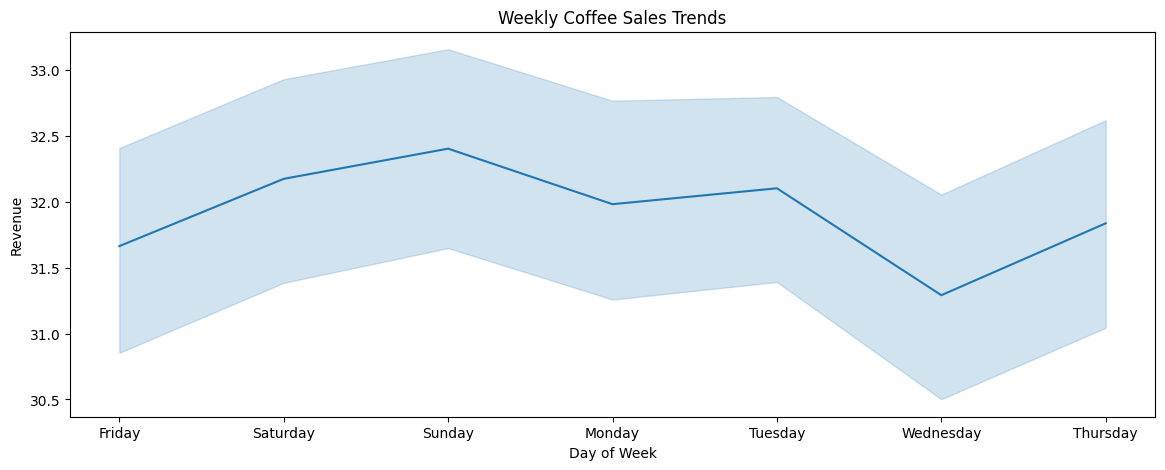

In [102]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='weekday')
plt.ylabel('Revenue')
plt.xlabel('Day of Week')
plt.xticks(coffee_df['weekday'].unique())
plt.title('Weekly Coffee Sales Trends')
plt.show()

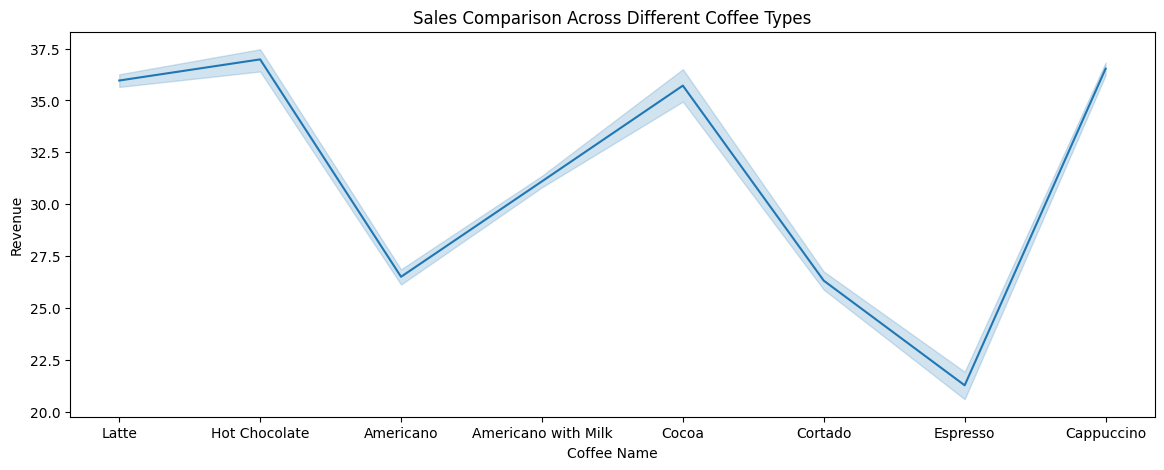

In [103]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='coffee_name')
plt.ylabel('Revenue')
plt.xlabel('Coffee Name')
plt.xticks(coffee_df['coffee_name'].unique())
plt.title('Sales Comparison Across Different Coffee Types')
plt.show()

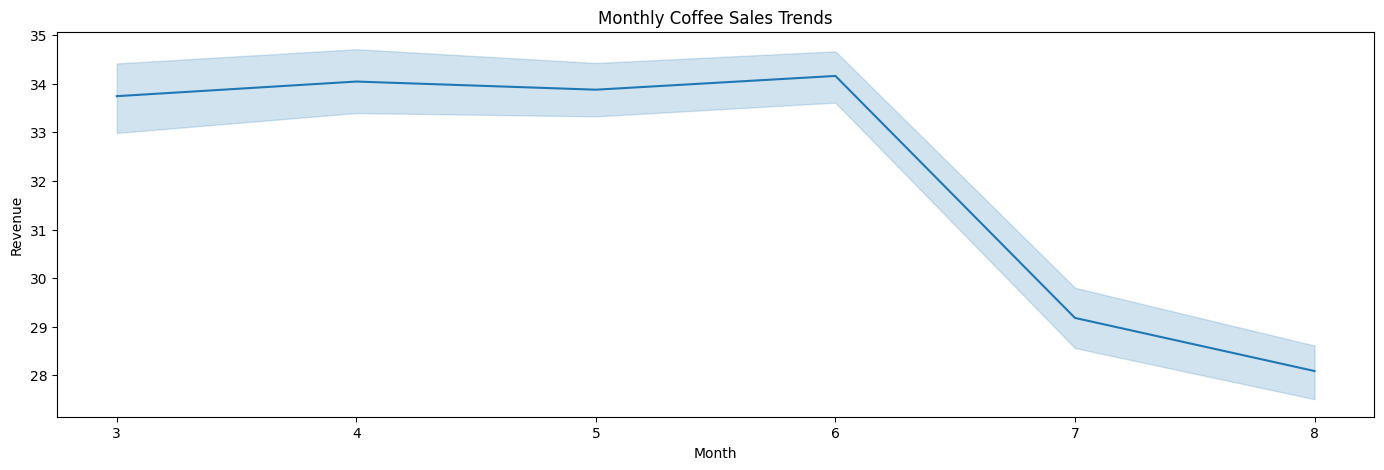

In [104]:
plt.figure(figsize=(17,5))
sns.lineplot(data=coffee_df,y='money',x='month')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(coffee_df['month'].unique())
plt.title('Monthly Coffee Sales Trends')
plt.show()

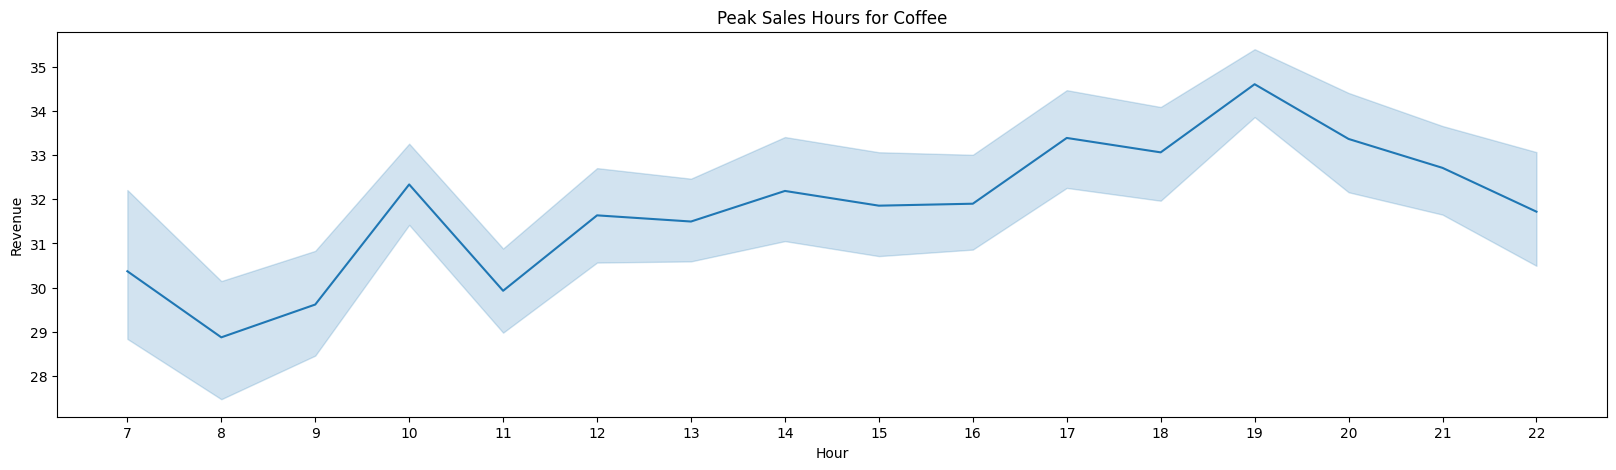

In [105]:
plt.figure(figsize=(20,5))
sns.lineplot(data=coffee_df,y='money',x='hour')
plt.ylabel('Revenue')
plt.xlabel('Hour')
plt.title('Peak Sales Hours for Coffee')
plt.xticks(coffee_df['hour'].unique())
plt.show()

# Next day/week/month sales

In [106]:
#monthly sales report
monthly_sales=coffee_df.groupby(['coffee_name','month',])['weekday'].count()
monthly_sales


coffee_name          month
Americano            3        32
                     4        33
                     5        40
                     6        14
                     7        36
                     8        36
Americano with Milk  3        30
                     4        38
                     5        54
                     6        66
                     7        65
                     8        68
Cappuccino           3        15
                     4        36
                     5        52
                     6        46
                     7        32
                     8        34
Cocoa                3         6
                     4         4
                     5         8
                     6         4
                     7         9
                     8        11
Cortado              3        28
                     4        16
                     5        17
                     6        19
                     7        14
                     8        37
Espresso             3         9
                     4         4
                     5         7
                     6        10
                     7        14
                     8        13
Hot Chocolate        3        20
                     4        10
                     5        13
                     6        14
                     7        11
                     8         6
Latte                3        35
                     4        27
                     5        50
                     6        50
                     7        56
                     8        57
Name: weekday, dtype: int64

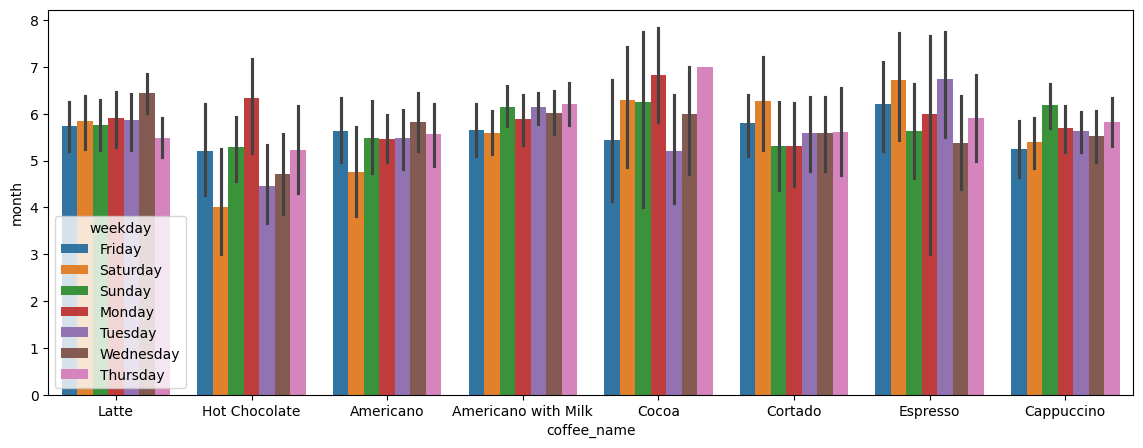

In [107]:
plt.figure(figsize=(14,5))
sns.barplot(data=coffee_df,y='month',x='coffee_name',hue='weekday')

plt.show()

In [108]:
#daily sales report
daily_sales=coffee_df.groupby(['coffee_name','day',])['weekday'].count()
daily_sales


coffee_name  day
Americano    1       4
             2       7
             3       2
             4       1
             5       6
                    ..
Latte        27      6
             28      6
             29      7
             30     12
             31     11
Name: weekday, Length: 227, dtype: int64

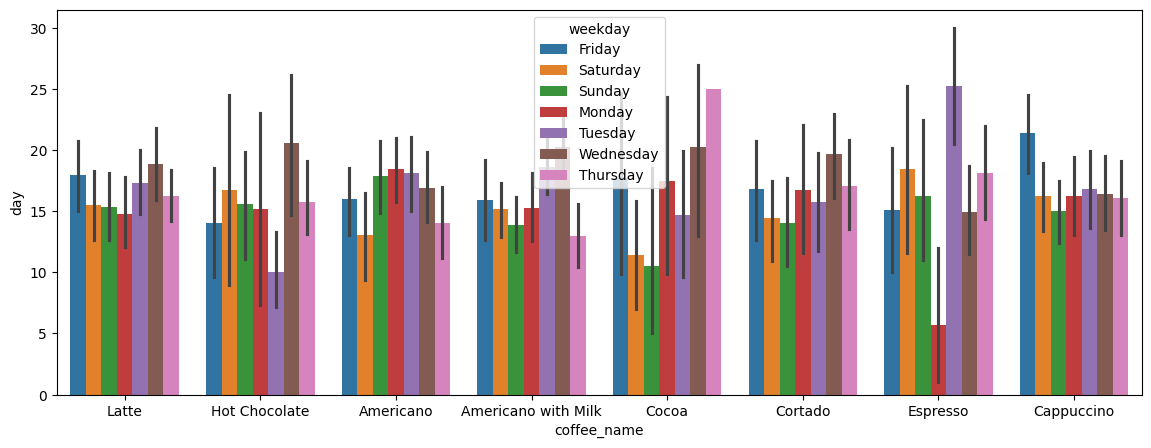

In [109]:
plt.figure(figsize=(14,5))
sns.barplot(data=coffee_df,y='day',x='coffee_name',hue='weekday')

plt.show()

# Specific customer purchases

<Axes: xlabel='cash_type', ylabel='money'>

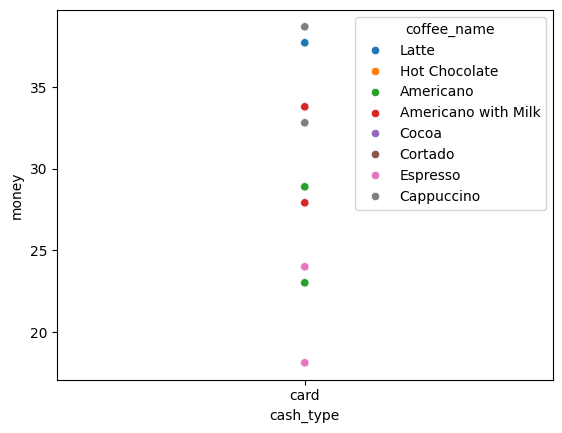

In [110]:
sns.scatterplot(data=coffee_df,x='cash_type',y='money',hue='coffee_name')